        Tratando dados do levantamento físico e banco de dados Suap

In [5]:
import pandas as pd

#total geral = 10061; total livros = 4706; total geral sem livros = 5355

suap = pd.read_excel('suap.xlsx')
suap = suap[['NUMERO', 'ED', 'DESCRICAO', 'CARGA ATUAL', 'SALA']]
# print('suap info')
# display(suap.info())

priori= pd.read_excel('priori.xlsx')

"""priori_parcial = pd.read_excel('prioriparcial.xlsx')
priori_parcial = priori_parcial.rename(columns={'N° Ativo': 'NUMERO', 'Nome do custo': 'ED_priori', 'Descrição': 'DESCRICAO_priori',
                               'Nome Local': 'SALA_priori'})
priori_parcial = priori_parcial.drop(columns=['Estado do bem'])
display(priori_parcial.info())
priori_parcial = priori_parcial[['NUMERO', 'ED_priori', 'DESCRICAO_priori', 'SALA_priori']]"""

priori = priori.rename(columns={'N° Ativo': 'NUMERO', 'Nome do custo': 'ED_priori', 'Descrição': 'DESCRICAO_priori',
                               'Nome Local': 'SALA_priori'})
priori = priori.drop(columns=['Estado do bem'])
# print('priori completo info')
# display(priori.info())

# priori_total = pd.concat([priori, priori_parcial])
# priori_total = priori_total.drop_duplicates()

# display(priori_total.info())

priori_livros = priori[priori['ED_priori'].str.contains('449052-18')]
# print('priori livros info')
# display(priori_livros.info())



priori = priori[priori['ED_priori'].str.contains('449052-18')==False]
# print('priori sem livros info')
# display(priori.info())


In [6]:
livros1 = pd.read_table("parte 1 biblio.xls")
# display(livros1.info())
livros2 = pd.read_table("parte 2 biblio.xls")
# display(livros2.info())
livros3 = pd.read_table("parte 3 biblio.xls")
# display(livros3.info())
livros4 = pd.read_table("parte 4 biblio.xls")
livros5 = pd.read_table("parte 5 biblio.xls")

suap_livros = pd.concat([livros1, livros2, livros3, livros4, livros5])
suap_livros = suap_livros[['NUMERO', 'DESCRICAO', 'CARGA ATUAL']]
# display(suap_livros.info())

In [7]:
diferenca = pd.merge(suap, priori, on='NUMERO', how='outer', indicator=True)
diferenca.to_excel('diferenca_total.xlsx', index=False)
diferenca_SUAP = diferenca[diferenca['_merge'].str.contains('left_only')]
# print(diferenca_SUAP.info())
diferenca_SUAP.to_excel("diferenca_suap.xlsx", index=False)

In [8]:
diferenca_livros = pd.merge(suap_livros, priori_livros, on='NUMERO', how='outer', indicator=True)
# display(diferenca_livros)
diferenca_livros.to_excel('diferenca_livros.xlsx', index=False)

diferenca_livros_suap = diferenca_livros[diferenca_livros['_merge'].str.contains('left_only')]
# print(diferenca_livros_suap.info())

diferenca_livros_priori = diferenca_livros[diferenca_livros['_merge'].str.contains('right_only')]
# print(diferenca_livros_priori.info())

## Gerando Grafícos dos resultados do inventário

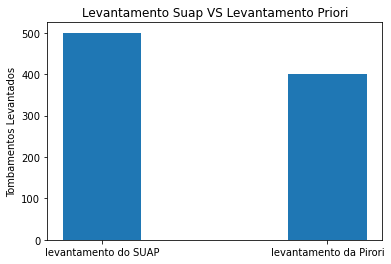

In [21]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['levantamento do SUAP', 'levantamento da Pirori']
tam = [500, 400]
width = 0.35

plt.bar(labels, tam, width)
plt.title('Levantamento Suap VS Levantamento Priori')
plt.ylabel('Tombamentos Levantados')


plt.show()